In [1]:
#!nvidia-smi  # Trained on google Colab

In [1]:
#!pip install tensorflow-gpu

In [1]:
import tensorflow as tf

In [2]:
import tensorflow as tf
print("TensorFlow version: {}".format(tf.__version__))
print("Keras version: {}".format(tf.keras.__version__))

TensorFlow version: 2.2.0
Keras version: 2.3.0-tf


In [3]:
#!pip install tensorflow==2.2

In [9]:
from platform import python_version
python_version()

'3.7.3'

In [ ]:
#!pip install keras==2.3.0

In [5]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [26]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'D:/PycharmProjects/Cotton-Disease-Prediction-Deep-Learning-master/data/train/'
valid_path = 'D:/PycharmProjects/Cotton-Disease-Prediction-Deep-Learning-master/data/test/'


In [11]:
# Import the Inception V3 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 29s 0us/step


In [12]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [27]:
 # useful for getting number of output classes
folders = glob('D:/PycharmProjects/Cotton-Disease-Prediction-Deep-Learning-master/data/train/*')

In [29]:
# our layers - you can add more if you want
x = Flatten()(inception.output)
x

<tf.Tensor 'flatten/Identity:0' shape=(None, 51200) dtype=float32>

In [30]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [31]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [32]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [33]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [38]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('D:/PycharmProjects/Cotton-Disease-Prediction-Deep-Learning-master/data/train/',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [39]:
test_set = test_datagen.flow_from_directory('D:/PycharmProjects/Cotton-Disease-Prediction-Deep-Learning-master/data/test/',
                                            target_size = (224, 224),
                                            batch_size = 32, 
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [40]:
1951/32


60.96875

In [41]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
61/61 [==============================] - 208s 3s/step - loss: 0.5224 - accuracy: 0.9001 - val_loss: 0.3919 - val_accuracy: 0.8889
Epoch 2/50
61/61 [==============================] - 206s 3s/step - loss: 0.4081 - accuracy: 0.9165 - val_loss: 0.0270 - val_accuracy: 1.0000
Epoch 3/50
61/61 [==============================] - 209s 3s/step - loss: 0.6166 - accuracy: 0.8995 - val_loss: 7.8570e-04 - val_accuracy: 1.0000
Epoch 4/50
61/61 [==============================] - 208s 3s/step - loss: 0.8456 - accuracy: 0.8934 - val_loss: 0.7017 - val_accuracy: 0.8333
Epoch 5/50
61/61 [==============================] - 229s 4s/step - loss: 0.4090 - accuracy: 0.9462 - val_loss: 0.2613 - val_accuracy: 0.8889
Epoch 6/50
61/61 [==============================] - 220s 4s/step - loss: 0.4214 - accuracy: 0.9400 - val_loss: 0.0782 - val_accuracy: 0.9444
Epoch 7/50
61/61 [==============================] - 198s 3s/step - loss: 0.3240 - accuracy: 0.9482 - val_loss: 1.7463e-05 - val_accuracy: 1.0000
Epoch

In [42]:
import matplotlib.pyplot as plt

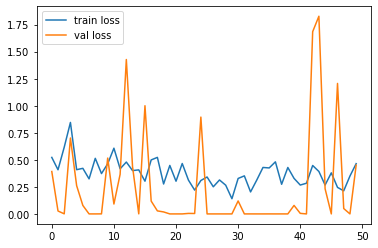

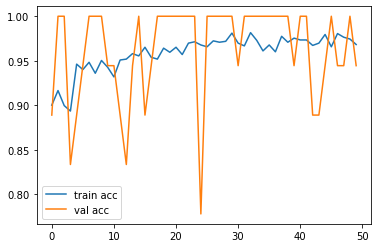

<Figure size 432x288 with 0 Axes>

In [43]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [103]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inceptionV3.h5')

In [104]:
y_pred = model.predict(test_set)

In [105]:
y_pred

array([[9.3888666e-23, 1.6063445e-37, 1.0000000e+00, 2.1185123e-36],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 2.9197643e-37],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.1921202e-34, 2.1550293e-09, 8.9729649e-33, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 4.0304219e-38, 1.1948078e-24],
       [1.7307423e-36, 1.2657729e-16, 1.0000000e+00, 4.8841933e-34],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 3.0441561e-38],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.1590643e-16, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [8.4876863e-34, 2.2736685e-25, 1.0000000e+00, 1.6842649e-20],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [5.9725302e-24, 1.5770821e-03, 7.5702809e-26, 9.9842298e-01],
       [0.0000000e+00, 1.7684864e-

In [106]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [107]:
y_pred

array([2, 1, 1, 0, 3, 1, 2, 0, 1, 1, 2, 2, 3, 3, 3, 1, 3, 2], dtype=int64)

In [108]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [109]:
model=load_model('model_inceptionV3.h5')

In [160]:
img=image.load_img('D:PycharmProjects/Cotton-Disease-Prediction-Deep-Learning-master/data/test/diseased cotton leaf/dis_leaf (248).jpg',target_size=(224,224))

In [161]:
x=image.img_to_array(img)


In [162]:
x=x/255

In [163]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [164]:
model.predict(img_data)

array([[1.0000000e+00, 0.0000000e+00, 1.9358142e-34, 0.0000000e+00]],
      dtype=float32)

In [165]:
a=np.argmax(model.predict(img_data), axis=1)

In [166]:
a

array([0], dtype=int64)